<a href="https://colab.research.google.com/github/mafegomez-c/Laboratorio-fisica-moderna/blob/main/Radiactividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

El punto de corte de la función es: 8.784155442720929
Pendiente esperada (debe ser cercana a -2): -2.216
Valor obtenido de A: 6529.956


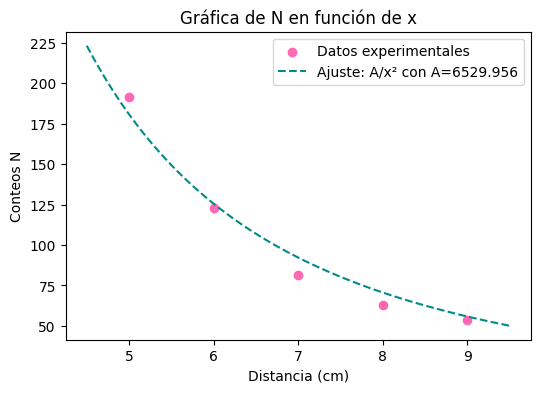

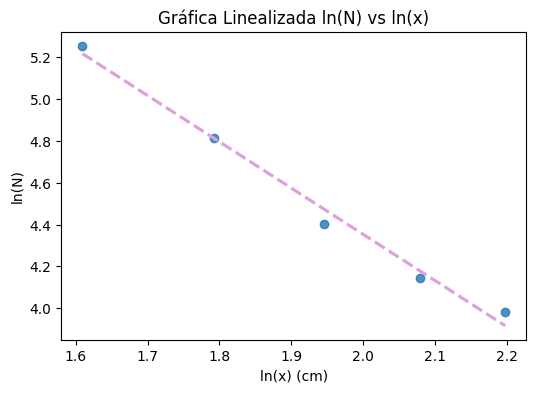

La ecuación del gráfico es y=: -2.216+ 8.784155442720929


In [55]:
#Gráfica 1
x = np.array([5, 6, 7, 8, 9])
N_menos_ambiente = np.array([191.6667, 123, 81.6667, 63, 53.6667])  # Conteos corregidos

ln_x = np.log(x)
ln_N = np.log(N_menos_ambiente)

coefs = np.polyfit(ln_x, ln_N, 1)
pendiente = coefs[0]

ln_A = coefs[1]
A = np.exp(ln_A)
print(f"El punto de corte de la función es: {coefs[1]}")
print(f"Pendiente esperada (debe ser cercana a -2): {pendiente:.3f}")
print(f"Valor obtenido de A: {A:.3f}")


def modelo(x, A):
    return A / x**2

popt, pcov = curve_fit(modelo, x, N_menos_ambiente)
A_fit = popt[0]

x_fit = np.linspace(4.5, 9.5, 100)
y_fit = modelo(x_fit, A_fit)

plt.figure(figsize=(6, 4))
plt.scatter(x, N_menos_ambiente, color='hotpink', label="Datos experimentales")
plt.plot(x_fit, y_fit, color='darkcyan', linestyle="--", label=f"Ajuste: A/x² con A={6529.956}")
plt.xlabel("Distancia (cm)")
plt.ylabel("Conteos N")
plt.title("Gráfica de N en función de x")
plt.legend()

plt.show()

plt.figure(figsize=(6, 4))
sns.regplot(x=ln_x, y=ln_N, scatter=True, line_kws={'color':'plum', 'linestyle':'--'}, ci=None)
plt.xlabel("ln(x) (cm)")
plt.ylabel("ln(N)")
plt.title("Gráfica Linealizada ln(N) vs ln(x)")
plt.show()
print(f"La ecuación del gráfico es y=: {pendiente:.3f}+ {coefs[1]}")

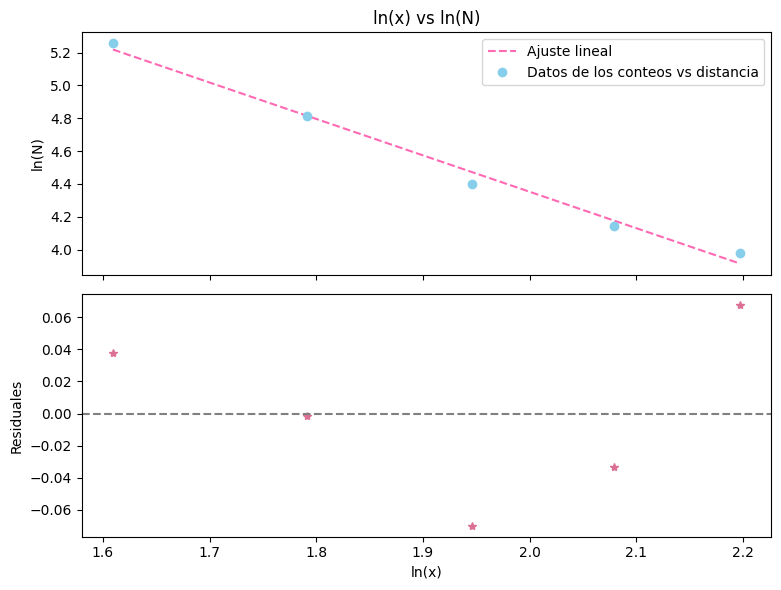

In [56]:
yerr = np.std(ln_N) * np.ones_like(ln_N)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
ax1.errorbar(ln_x, ln_N, marker="o", linestyle="", label="Datos de los conteos vs distancia", color="skyblue", capsize=3)
ax1.plot(ln_x, B_exp * ln_x + ln_A, linestyle="--", label="Ajuste lineal", color="hotpink")
ax1.set_ylabel("ln(N)")
ax1.set_title("ln(x) vs ln(N)")
ax1.legend()
ax1.grid(False)

# Residuales plot
residuals = ln_N - (B_exp * ln_x + ln_A)
ax2.plot(ln_x, residuals, marker="*", linestyle=" ", color="palevioletred")
ax2.axhline(y=0, color="gray", linestyle="--")
ax2.set_xlabel("ln(x)")
ax2.set_ylabel("Residuales")
ax2.grid(False)

plt.tight_layout()
plt.show()

In [64]:
import numpy as np

x_cm = np.array([5, 6, 7, 8, 9])
N_menos_ambiente = np.array([191.6667, 123, 81.6667, 63, 53.6667])

ln_x = np.log(x_cm)
ln_N = np.log(N_menos_ambiente)


n = len(x_cm)
sum_x = np.sum(ln_x)
sum_y = np.sum(ln_N)
sum_x2 = np.sum(ln_x ** 2)
sum_xy = np.sum(ln_x * ln_N)

m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y - m * sum_x) / n

m, b

(np.float64(-2.2157899753715307), np.float64(8.784155442720884))

In [66]:
import numpy as np

x_cm = np.array([5, 6, 7, 8, 9])
N_menos_ambiente = np.array([191.6667, 123, 81.6667, 63, 53.6667])

ln_x = np.log(x_cm)
ln_N = np.log(N_menos_ambiente)

coefs = np.polyfit(ln_x, ln_N, 1)
pendiente = coefs[0]

ln_A = coefs[1]
A = np.exp(ln_A)
print(f"El punto de corte de la función es: {coefs[1]}")
print(f"Pendiente esperada (debe ser cercana a -2): {pendiente:.3f}")
print(f"Valor obtenido de A: {A:.3f}")


n = len(x_cm)
sum_x = np.sum(ln_x)
sum_y = np.sum(ln_N)
sum_x2 = np.sum(ln_x ** 2)
sum_xy = np.sum(ln_x * ln_N)
sum_y2 = np.sum(ln_N ** 2)

sigma_y = np.sqrt((sum_y2 - (sum_y**2)/n - pendiente**2 * (sum_x2 - (sum_x**2)/n)) / (n - 2))
sigma_m = sigma_y / np.sqrt(sum_x2 - (sum_x**2)/n)

print(f"Incertidumbre de la pendiente (m): {sigma_m:.3f}")
sigma_b = sigma_y * np.sqrt(sum_x2 / (n * (sum_x2 - (sum_x**2)/n)))
print(f"Incertidumbre del punto de corte (ln_A): {sigma_b:.3f}")

El punto de corte de la función es: 8.784155442720929
Pendiente esperada (debe ser cercana a -2): -2.216
Valor obtenido de A: 6529.956
Incertidumbre de la pendiente (m): 0.136
Incertidumbre del punto de corte (ln_A): 0.263


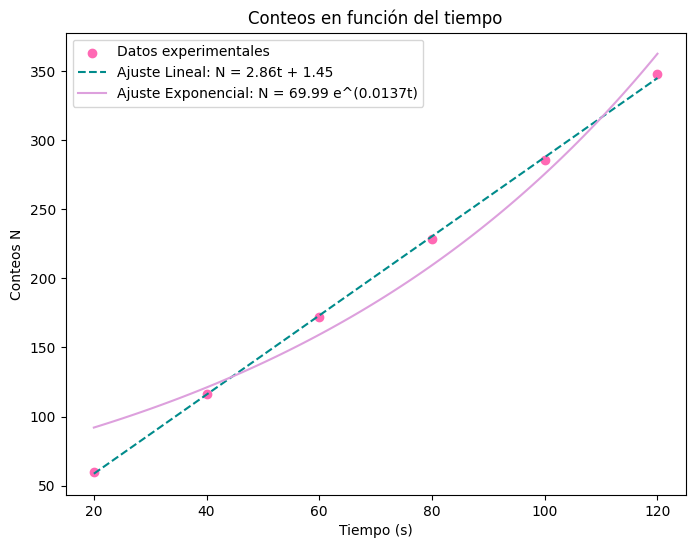

(np.float64(2.8619142857183473),
 np.float64(1.4460000000009634),
 np.float64(69.99135045714259),
 np.float64(0.013704556163474156))

In [76]:
#Gráfica 2 de

t = np.array([20, 40, 60, 80, 100, 120])
N = np.array([59.67, 116.67, 172.33, 228.67, 285.67, 347.67])
def modelo_lineal(t, A, B):
    return A * t + B

params_lineal, cov_lineal = curve_fit(modelo_lineal, t, N)
A_lineal, B_lineal = params_lineal

def modelo_exponencial(t, A, B):
    return A * np.exp(B * t)

params_exp, cov_exp = curve_fit(modelo_exponencial, t, N, p0=[50, 0.01])
A_exp, B_exp = params_exp

t_fit = np.linspace(min(t), max(t), 100)
N_fit_lineal = modelo_lineal(t_fit, A_lineal, B_lineal)
N_fit_exp = modelo_exponencial(t_fit, A_exp, B_exp)

plt.figure(figsize=(8,6))
plt.scatter(t, N, color='hotpink', label='Datos experimentales')
plt.plot(t_fit, N_fit_lineal, linestyle='--', color="darkcyan", label=f'Ajuste Lineal: N = {A_lineal:.2f}t + {B_lineal:.2f}')
plt.plot(t_fit, N_fit_exp, linestyle='-', color="plum", label=f'Ajuste Exponencial: N = {A_exp:.2f} e^({B_exp:.4f}t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Conteos N')
plt.title('Conteos en función del tiempo')
plt.legend()
plt.show()

A_lineal, B_lineal, A_exp, B_exp

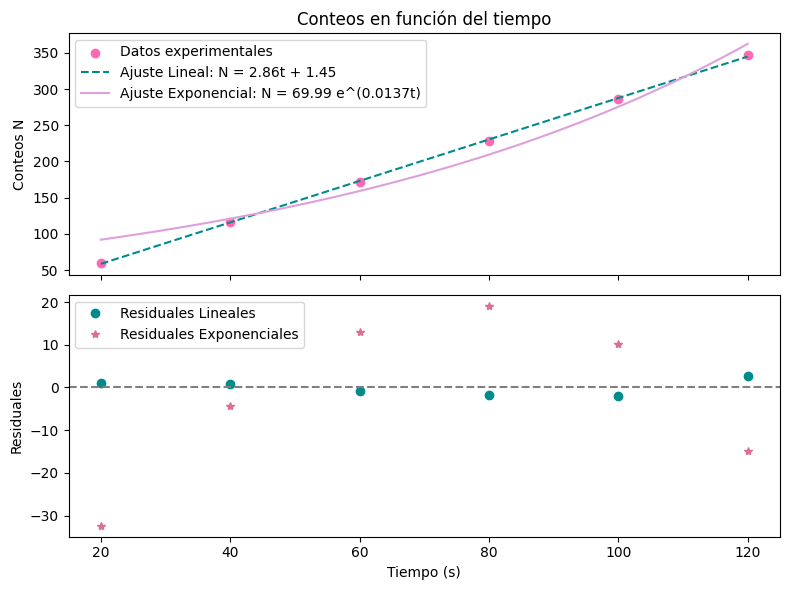

In [75]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

ax1.scatter(t, N, color='hotpink', label='Datos experimentales')
ax1.plot(t_fit, N_fit_lineal, linestyle='--', color="darkcyan", label=f'Ajuste Lineal: N = {A_lineal:.2f}t + {B_lineal:.2f}')
ax1.plot(t_fit, N_fit_exp, linestyle='-', color="plum", label=f'Ajuste Exponencial: N = {A_exp:.2f} e^({B_exp:.4f}t)')
ax1.set_ylabel('Conteos N')
ax1.set_title('Conteos en función del tiempo')
ax1.legend()
ax1.grid(False)

residuals_exp = N - modelo_exponencial(t, A_exp, B_exp)

residuals_lineal = N - modelo_lineal(t, A_lineal, B_lineal)

ax2.plot(t, residuals_lineal, marker="o", linestyle=" ", color="darkcyan", label="Residuales Lineales")
ax2.plot(t, residuals_exp, marker="*", linestyle=" ", color="palevioletred", label="Residuales Exponenciales")

ax2.axhline(y=0, color="gray", linestyle="--")
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Residuales')
ax2.legend()
ax2.grid(False)

plt.tight_layout()
plt.show()

In [79]:
import numpy as np

t = np.array([20, 40, 60, 80, 100, 120])
N = np.array([59.67, 116.67, 172.33, 228.67, 285.67, 347.67])

n = len(t)
sum_t = np.sum(t)
sum_N = np.sum(N)
sum_t2 = np.sum(t**2)
sum_tN = np.sum(t*N)
sum_N2 = np.sum(N**2)
A = (n * sum_tN - sum_t * sum_N) / (n * sum_t2 - sum_t**2)
B = (sum_N - A * sum_t) / n

sigma_N = np.sqrt((sum_N2 - (sum_N**2)/n - A**2 * (sum_t2 - (sum_t**2)/n)) / (n - 2))
sigma_A = sigma_N / np.sqrt(sum_t2 - (sum_t**2)/n)
sigma_B = sigma_N * np.sqrt(sum_t2 / (n * (sum_t2 - (sum_t**2)/n)))

print(f"Incertidumbre de la pendiente (A): {sigma_A:.3f}")
print(f"Incertidumbre del punto de corte (B): {sigma_B:.3f}")

Incertidumbre de la pendiente (A): 0.025
Incertidumbre del punto de corte (B): 1.913
